#### loading and preparing data

In [1]:
import pandas as pd

# Load the dataset using pandas
df = pd.read_csv("Data/breast-cancer.csv")

print(df.shape)

# Display the first few rows of the dataset
print(df.head())

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

#### preprocessing data

In [3]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target variable
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
df_preprocessed = pd.concat([df_scaled, y], axis=1)

# Display the first few rows of the preprocessed dataset
print(df_preprocessed.head())


         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405     1.097064     -2.073335        1.269934   0.984375   
1 -0.236403     1.829821     -0.353632        1.685955   1.908708   
2  0.431741     1.579888      0.456187        1.566503   1.558884   
3  0.432121    -0.768909      0.253732       -0.592687  -0.764464   
4  0.432201     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0       2.217515  ...      -1.359293         2.303601

#### define a pipeline with preprocessing and clustering

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Separate the features and target variable
X = df_preprocessed.drop(['diagnosis'], axis=1)
y = df_preprocessed['diagnosis']

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: feature scaling
    ('clustering', KMeans(n_clusters=3))  # Clustering algorithm: KMeans
])

# Fit the pipeline to the data
pipeline.fit(X)

# Perform clustering and obtain the labels
cluster_labels = pipeline.predict(X)

# Display the cluster labels
print(cluster_labels)


[2 2 2 0 2 0 2 0 0 0 1 0 2 1 0 0 1 0 2 1 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 0 0
 1 1 0 1 0 2 0 1 2 1 0 1 1 1 1 1 2 1 1 2 0 1 1 1 1 0 1 0 0 1 1 0 1 2 0 0 1
 1 2 1 2 2 1 1 0 2 2 1 2 1 2 1 0 1 1 1 1 0 2 1 1 1 0 1 1 1 1 1 0 1 1 2 1 1
 0 0 1 1 1 1 0 0 1 1 2 2 1 1 1 1 2 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 2 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 0 1 1 1 0 0 1 1 2 2 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 2 2 0 1 2 2 0 1 1 1 1 0 1 2 1 2 0 0 0 0 1 2 2 1 1
 1 0 1 1 1 1 1 0 0 1 1 2 1 1 2 2 1 2 1 1 0 1 2 1 1 0 1 1 2 1 2 1 2 1 2 0 2
 0 2 1 2 1 2 2 1 1 1 0 1 1 2 1 1 1 1 1 1 1 2 1 2 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 2 1 2 1 1 1 1 0 0 0 1 1
 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 0 2 0 1 1 0 1 1 1 1 1 1 1 1 2 2 1 2 2
 0 1 2 2 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 2 1 1 0 2 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 0 1 2 2 1 0 1 1 1 1 0 2 1 1
 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 2 1 1 1 1 2 

#### Dimension reduction and visualization with pca and tsne

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Perform dimension reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform dimension reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


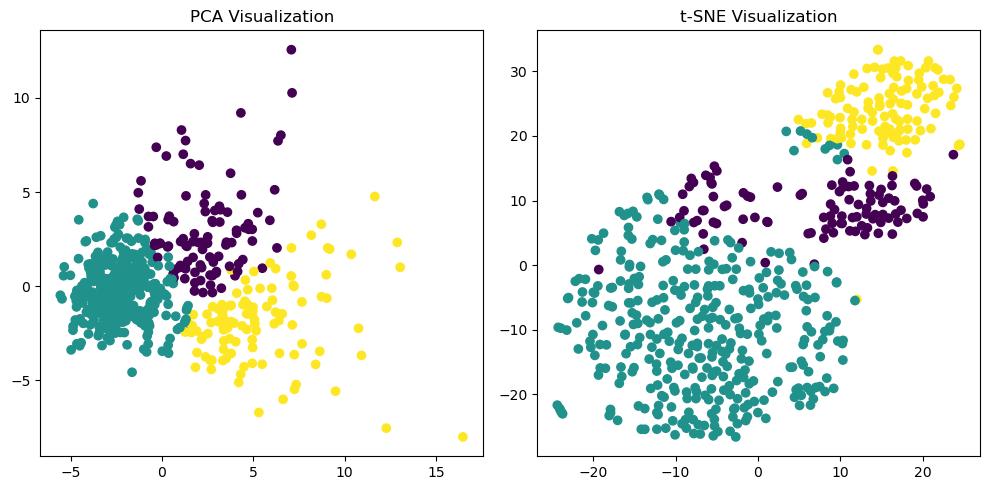

In [6]:
# Visualize using PCA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.title('PCA Visualization')

# Visualize using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels)
plt.title('t-SNE Visualization')

# Display the plot
plt.tight_layout()
plt.show()

GridSearchCV for hyperparameter

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# pipeline with preprocessing and clustering
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: feature scaling
    ('clustering', KMeans())  # Clustering algorithm: KMeans
])

# parameter grid for hyperparameter tuning
param_grid = {
    'clustering__n_clusters': [3, 4, 5],  # Number of clusters
    'clustering__init': ['k-means++', 'random'],  # Initialization method
    'clustering__max_iter': [100, 200, 300]  # Maximum number of iterations
}

In [8]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model to the data
best_model.fit(X)

# Perform clustering and obtain the labels using the best model
cluster_labels = best_model.predict(X)

# Display the best hyperparameters and the cluster labels
print("Best Hyperparameters:", best_params)
print("Cluster Labels:", cluster_labels)

Best Hyperparameters: {'clustering__init': 'k-means++', 'clustering__max_iter': 300, 'clustering__n_clusters': 5}
Cluster Labels: [4 3 3 0 3 0 3 0 0 0 1 3 4 3 0 0 3 0 3 1 1 2 0 3 3 4 0 3 0 3 4 0 3 3 0 3 0
 1 1 0 1 2 4 0 1 3 2 0 1 1 1 1 1 3 1 1 3 0 1 2 2 2 0 2 0 0 2 1 0 1 3 2 0 1
 1 3 2 4 4 1 2 0 4 3 1 3 2 3 2 2 1 1 1 1 3 3 1 2 1 2 1 2 1 2 2 0 2 1 4 2 2
 2 0 2 2 1 2 0 0 3 1 3 4 1 1 1 1 3 2 3 2 3 3 1 3 1 1 1 3 2 1 3 2 1 1 2 0 2
 1 1 2 0 0 1 2 1 3 1 1 1 2 3 3 2 3 1 1 3 3 1 1 1 0 2 1 1 0 0 1 1 4 4 3 1 1
 2 3 1 1 1 0 1 1 0 0 1 0 3 3 0 2 3 4 0 2 1 2 3 0 1 3 1 4 0 0 0 2 2 3 3 1 1
 2 3 1 1 1 1 1 0 3 1 1 3 2 1 4 3 1 3 1 1 0 1 3 2 1 0 2 1 4 1 4 3 3 2 4 0 4
 0 3 1 3 1 3 4 2 1 1 2 1 1 4 2 3 2 1 3 1 1 3 1 3 0 1 1 2 1 2 1 0 1 2 1 1 1
 1 1 1 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 2 1 1 3 0 1 2 3 1 4 1 1 1 1 3 3 3 2 2
 1 1 3 1 3 2 4 1 2 2 3 2 2 1 1 1 2 1 0 4 3 1 2 2 1 2 1 1 1 1 1 1 3 4 1 3 4
 0 1 3 3 1 1 0 1 1 0 2 1 1 2 1 1 1 1 2 3 1 2 0 4 2 1 1 1 1 1 0 1 1 1 1 2 1
 1 3 1 1 1 1 1 1 2 2 4 1 1 2 0 2 1 2 1 2 1 1 

#### Evaluate performance

In [9]:
# Silhouette Score
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

# Display the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1662537883392132


In [10]:
# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz index
ch_score = calinski_harabasz_score(X, cluster_labels)

# Display the Calinski-Harabasz index
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 131.6251133201357


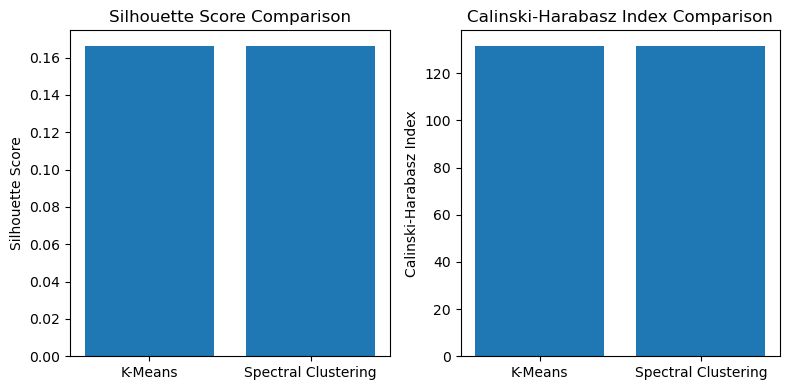

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Method names for the plot
methods = ['K-Means', 'Spectral Clustering']

# a bar plot for silhouette scores
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(methods, silhouette_avg)
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')

# a bar plot for Calinski-Harabasz index scores
plt.subplot(1, 2, 2)
plt.bar(methods, ch_score)
plt.title('Calinski-Harabasz Index Comparison')
plt.ylabel('Calinski-Harabasz Index')

# Display the plot
plt.tight_layout()
plt.show()
